# Lecture 26: Quiz 2 Discussion

---

1. **Linear Regression** *(15)*

Consider the following dataset with exogenous variables $X_1, X_2$ and endogenous variable $Y$

| Sno. | $X_1$ | $X_2$ |  $Y$  | $\text{fitted}: \hat{Y}$ | $\text{error}: \epsilon$ |
|------|-------|-------|-------|--------------------------|--------------------------|
| 1    | 5.0   | 19.1  | 21.2  |                          |                          |
| 2    | 5.7   | 22.8  | 24.6  |                          |                          |
| 3    | 4.9   | 8.5   | 14.3  |                          |                          |
| 4    | 5.5   | 2.8   | 12.4  |                          |                          |
| 5    | 1.4   | 2.4   | 4.2   |                          |                          |
| 6    | 2.7   | 16.9  | 14.9  |                          |                          |
| 7    | 7.2   | 23.4  | 26.7  |                          |                          |
| 8    | 3.6   | 2.3   | 9.0   |                          |                          |
| 9    | 6.9   | 4.0   | 15.9  |                          |                          |
| 10   | 2.4   | 6.4   | 7.8   |                          |                          |
| 11   | 2.7   | 4.5   | 7.3   |                          |                          |
| 12   | 2.7   | 15.9  | 14.1  |                          |                          |
| 13   | 5.6   | 6.1   | 15.7  |                          |                          |
| 14   | 2.0   | 6.8   | 7.8   |                          |                          |
| 15   | 2.5   | 1.5   | 5.8   |                          |                          |
| 16   | 5.2   | 24.2  | 22.0  |                          |                          |
| 17   | 4.2   | 12.2  | 14.0  |                          |                          |
| 18   | 6.5   | 13.7  | 18.9  |                          |                          |
| 19   | 2.4   | 13.5  | 11.6  |                          |                          |
| 20   | 8.1   | 6.1   | 20.1  |                          |                          |
| 21   | 3.3   | 11.4  | 11.9  |                          |                          |
| 22   | 5.1   | 16.0  | 18.1  |                          |                          |
| 23   | 6.7   | 17.8  | 21.7  |                          |                          |
| 24   | 3.6   | 27.6  | 22.6  |                          |                          |
| 25   | 7.2   | 24.8  | 28.0  |                          |                          |
| 26   | 1.6   | 3.2   | 4.9   |                          |                          |
| 27   | 6.4   | 21.6  | 23.6  |                          |                          |
| 28   | 1.8   | 9.6   | 8.8   |                          |                          |
| 29   | 6.4   | 3.0   | 14.9  |                          |                          |
| 30   | 4.5   | 12.0  | 15.3  |                          |                          |

Infer the outcomes of the following linear regression model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2$

| Coefficient | Estimate   | Standard Error | t Stat  | P-value | Lower 95% | Upper 95% |
|-------------|------------|----------------|---------|---------|-----------|-----------|
| $\beta_0$   | 0.044      | 0.341          | 0.129   | 0.898   | -0.656    | 0.745     |
| $\beta_1$   | 2.003      | 0.071          | 28.260  | 0.000   | 1.858     | 2.148     |
| $\beta_2$   | 0.524      | 0.017          | 30.102  | 0.000   | 0.489     | 0.560     |

a. Comment on the estimated value and significance of each coefficient - $\beta_0, \beta_1, \beta_2$ *(2)*

b. Fill in the above table, computing fitted values and corresponding errors *(3)*

c. Compute the following model statistics *(5)*

  - Sum Squares Total

  - Sum Squares Regression

  - Sum Squares Error

  - R-squared

  - Adjusted R-squared

d. Perform ex-post analysis (compute correlation between $X_1$ and $X_2$; draw residuals plot) to comment upon the validity of the model. *(5)*


Call:
lm(formula = Y ~ X1 + X2, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34581 -0.48412 -0.02973  0.51508  1.24201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.04254    0.34145   0.125    0.902    
X1           2.00301    0.07088  28.258   <2e-16 ***
X2           0.52436    0.01742  30.099   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7063 on 27 degrees of freedom
Multiple R-squared:  0.9895,	Adjusted R-squared:  0.9887 
F-statistic:  1272 on 2 and 27 DF,  p-value: < 2.2e-16


SST               : 1283.08 
SSR               : 1269.61 
SSE               : 13.47 
RSE               : 0.69 
R-squared         : 0.99 
Adjusted R-squared: 0.989 
Cor               : 0.33 


X1,X2,Y,fitted,resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.0,19.1,21.2,20.072807,1.12719278
5.7,22.8,24.6,23.415034,1.18496587
4.9,8.5,14.3,14.314332,-0.01433227
5.5,2.8,12.4,12.527311,-0.12731143
1.4,2.4,4.2,4.105212,0.09478792
2.7,16.9,14.9,14.312292,0.58770792
7.2,23.4,26.7,26.734169,-0.03416856
3.6,2.3,9.0,8.459407,0.54059296
6.9,4.0,15.9,15.960758,-0.06075808


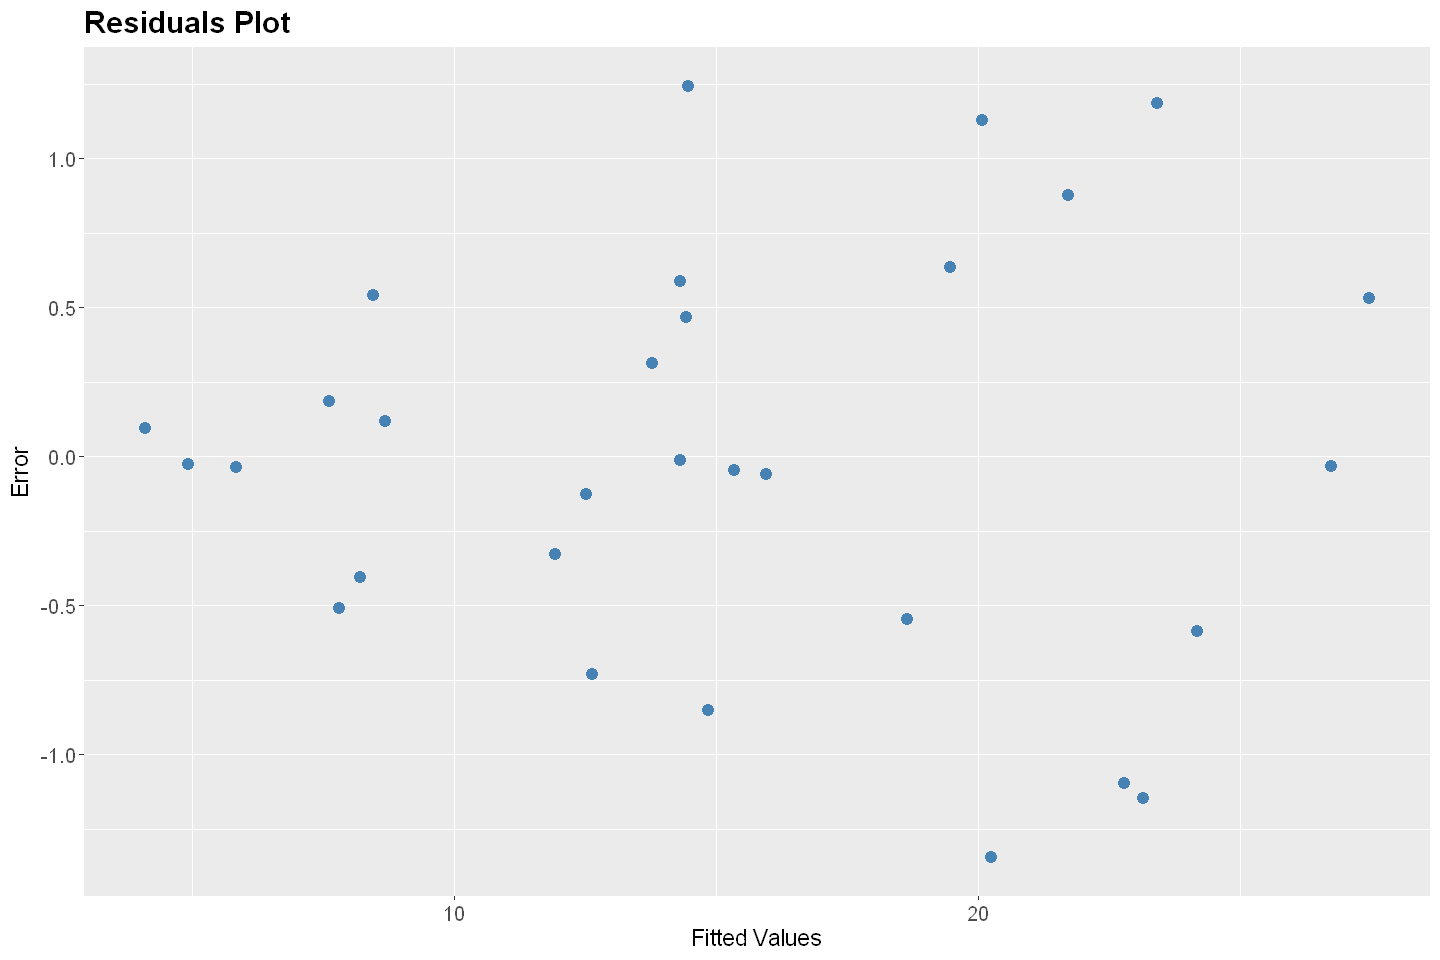

In [5]:
# Packages
library(dplyr)
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 8)

# Dataset
data <- data.frame( 
  X1 = c(5.0, 5.7, 4.9, 5.5, 1.4, 2.7, 7.2, 3.6, 6.9, 2.4, 2.7, 2.7, 5.6, 2.0, 2.5, 5.2, 4.2, 6.5, 2.4, 8.1, 3.3, 5.1, 6.7, 3.6, 7.2, 1.6, 6.4, 1.8, 6.4, 4.5),
  X2 = c(19.1, 22.8, 8.5, 2.8, 2.4, 16.9, 23.4, 2.3, 4.0, 6.4, 4.5, 15.9, 6.1, 6.8, 1.5, 24.2, 12.2, 13.7, 13.5, 6.1, 11.4, 16.0, 17.8, 27.6, 24.8, 3.2, 21.6, 9.6, 3.0, 12.0),
  Y  = c(21.2, 24.6, 14.3, 12.4, 4.2, 14.9, 26.7, 9.0, 15.9, 7.8, 7.3, 14.1, 15.7, 7.8, 5.8, 22.0, 14.0, 18.9, 11.6, 20.1, 11.9, 18.1, 21.7, 22.6, 28.0, 4.9, 23.6, 8.8, 14.9, 15.3)
)

# Model
model <- lm(Y ~ X1 + X2, data = data)
summary(model)

# Statistics
sst <- sum((data$Y - mean(data$Y))^2)
ssr <- sum((model$fitted.values - mean(data$Y))^2)
sse <- sum((data$Y - model$fitted.values)^2)
rse <- sqrt(sse / (nrow(data) - 2))
Rsquared <- ssr / sst
AdjRsquared <- 1 - (1 - Rsquared) * (nrow(data) - 1) / (nrow(data) - 2)
cat("SST               :", round(sst, 2), "\n")
cat("SSR               :", round(ssr, 2), "\n")
cat("SSE               :", round(sse, 2), "\n")
cat("RSE               :", round(rse, 2), "\n")
cat("R-squared         :", round(Rsquared, 3), "\n")
cat("Adjusted R-squared:", round(AdjRsquared, 3), "\n")

# Residuals Plot
cat("Cor               :", round(cor(data$X1, data$X2), 2), "\n")
data$fitted <- fitted(model)
data$resid  <- resid(model)
ggplot(data, aes(x = fitted, y = resid)) +
  geom_point(color = "steelblue", size = 3) +
  labs(
    title = "Residuals Plot",
    x = "Fitted Values",
    y = "Error"
  ) +
  theme(
    plot.title = element_text(size = 18, face = "bold"),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12)
  )

data

1. **Linearity**: *Satsified* - The residuals are randomly scattered around zero with no systematic curvature across the fitted values, indicating the linear functional form is adequate.

2. **Independence**: *Satisfied* - Since the samples were randomly and independently drawn, this assumption holds.  

3. **Homoskedasticity**: *Violated* - The residuals plot exhibits a funnel-shaped pattern, where the variance of residuals is low for lower fitted values and increases as fitted values increase. This indicates heteroskedasticity, which leads to inefficient estimates and unreliable standard errors.

4. **No Multicollinearity**: *Satisfied* - The model exhibits low correlation between the two exogenous variables.

5. **Zero Conditional Mean of Errors**: *Satisfied* - Residuals are approximately centered at zero across the range of fitted values, with no systematic positive/negative drift suggestive of an omitted-variable pattern.

2. **Logistic Regression** *(15)*

Consider the following dataset with exogenous variables $X_1, X_2$ and binary endogenous variable $Y$.

| SNo. | $X_1$ | $X_2$ | $Y$ | $Y = S$ | $Y = F$ | $\text{fitted}: \hat{P}_{Y = S}$ | $\text{fitted}: \hat{P}_{Y = F}$ |
|------|-------|-------|-----|---------|---------|----------------------------------|----------------------------------|
| 1    | 2.660 | 20.0  | F   |         |         |                                  |                                  |
| 2    | 2.890 | 22.0  | F   |         |         |                                  |                                  |
| 3    | 3.280 | 24.0  | F   |         |         |                                  |                                  |
| 4    | 2.920 | 12.0  | F   |         |         |                                  |                                  |
| 5    | 4.000 | 21.0  | S   |         |         |                                  |                                  |
| 6    | 2.860 | 17.0  | F   |         |         |                                  |                                  |
| 7    | 2.760 | 17.0  | F   |         |         |                                  |                                  |
| 8    | 2.870 | 21.0  | F   |         |         |                                  |                                  |
| 9    | 3.030 | 25.0  | F   |         |         |                                  |                                  |
| 10   | 3.920 | 29.0  | S   |         |         |                                  |                                  |
| 11   | 2.630 | 20.0  | F   |         |         |                                  |                                  |
| 12   | 3.320 | 23.0  | F   |         |         |                                  |                                  |
| 13   | 3.570 | 23.0  | F   |         |         |                                  |                                  |
| 14   | 3.260 | 25.0  | S   |         |         |                                  |                                  |
| 15   | 3.530 | 26.0  | F   |         |         |                                  |                                  |
| 16   | 2.740 | 19.0  | F   |         |         |                                  |                                  |
| 17   | 2.750 | 25.0  | F   |         |         |                                  |                                  |
| 18   | 2.830 | 19.0  | F   |         |         |                                  |                                  |
| 19   | 3.120 | 23.0  | F   |         |         |                                  |                                  |
| 20   | 3.160 | 25.0  | S   |         |         |                                  |                                  |
| 21   | 2.060 | 22.0  | F   |         |         |                                  |                                  |
| 22   | 3.620 | 28.0  | S   |         |         |                                  |                                  |
| 23   | 2.890 | 14.0  | F   |         |         |                                  |                                  |
| 24   | 3.510 | 26.0  | F   |         |         |                                  |                                  |
| 25   | 3.540 | 24.0  | S   |         |         |                                  |                                  |
| 26   | 2.830 | 27.0  | S   |         |         |                                  |                                  |
| 27   | 3.390 | 17.0  | S   |         |         |                                  |                                  |
| 28   | 2.670 | 24.0  | F   |         |         |                                  |                                  |
| 29   | 3.650 | 21.0  | S   |         |         |                                  |                                  |
| 30   | 4.000 | 23.0  | S   |         |         |                                  |                                  |

Infer the outcomes of the following logistic regression model 

$$
\log\!\left(\frac{\hat{P}_{Y = S}}{1-\hat{P}_{Y = S}}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2
$$

| Coefficient | Estimate | Std. Error | z value | P-value |
|-------------|----------|------------|---------|---------|
| $\beta_0$   | -15.63   | 5.644      | -2.770  | 0.006   |
| $\beta_1$   | 3.815    | 1.538      | 2.479   | 0.013   |
| $\beta_2$   | 0.113    | 0.164      | 0.690   | 0.490   |

a. Comment on the estimated value and significance of each coefficient $\beta_0, \beta_1, \beta_2$. *(2)*

b. Fill in the above table *(3)*

c. Compute the following model statistics *(6)*

  - Log-Likelihood for
    
    - Equally-Likely Model

    - Market Share Model

  - McFadden R-squared for the Estimated Model vs.
        
    - Equally-Likely Model

    - Market Share Model
    
  - Adjusted McFadden R-squared for the Estimated Model vs.
        
    - Equally-Likely Model

    - Market Share Model

In [ ]:
# Packages
library(dplyr)
library(tidyr)
library(mlogit)

# Dataset
data <- data.frame(
  ID = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30),
  X1 = c(2.66, 2.89, 3.28, 2.92, 4.00, 2.86, 2.76, 2.87, 3.03, 3.92, 2.63, 3.32, 3.57, 3.26, 3.53, 2.74, 2.75, 2.83, 3.12, 3.16, 2.06, 3.62, 2.89, 3.51, 3.54, 2.83, 3.39, 2.67, 3.65, 4.00),
  X2 = c(20, 22, 24, 12, 21, 17, 17, 21, 25, 29, 20, 23, 23, 25, 26, 19, 25, 19, 23, 25, 22, 28, 14, 26, 24, 27, 17, 24, 21, 23),
  Y  = c("F", "F", "F", "F", "S", "F", "F", "F", "F", "S", "F", "F", "F", "S", "F", "F", "F", "F", "F", "S", "F", "S", "F", "F", "S", "S", "S", "S", "F", "F")
)
data$S <- ifelse(data$Y == "S", 1, 0)
data$F <- ifelse(data$Y == "F", 1, 0)

# Long-Form
long_data <- data %>%
  select(ID, X1, X2, S, F) %>%
  pivot_longer(
    cols = c(S, F),
    names_to = "alt",
    values_to = "bin"
  ) %>%
  mutate(bin = bin == 1)

# Model Data
model_data <- mlogit.data(
  long_data,
  choice = "bin",
  shape = "long",
  chid.var = "ID",
  alt.var = "alt"
)

# Model
model <- mlogit(bin ~ 1 | X1 + X2, data = model_data)
summary(model)

data$`P(Y=S)` <- fitted.values(model) * data$S + (1 - fitted.values(model)) * data$F
data$`P(Y=F)` <- 1 - data$`P(Y=S)`

# Statistics
LL_EL  <- sum(data$S * log(1/2) + data$F * log(1/2))
LL_MS  <- sum(data$S * log(0.3) + data$F * log(0.7)) 
LL_MNL <- sum(data$S * log(data$`P(Y=S)`) + data$F * log(data$`P(Y=F)`))
R2_EL  <- 1 - (LL_MNL / LL_EL)
R2_MS  <- 1 - (LL_MNL / LL_MS)
AR2_EL <- 1 - ((LL_MNL - 3) / LL_EL)
AR2_MS <- 1 - ((LL_MNL - 3) / LL_MS)

cat("\n--- Log-likelihoods ---\n")
cat(sprintf("EL  : %0.3f\n", LL_EL))
cat(sprintf("MS  : %0.3f\n", LL_MS))
cat(sprintf("MNL : %0.3f\n", LL_MNL))
cat("\n--- McFadden R^2 ---\n")
cat(sprintf("R2 vs EL : %0.4f\n", R2_EL))
cat(sprintf("R2 vs MS : %0.4f\n", R2_MS))
cat("\n--- Adjusted McFadden R^2 ---\n")
cat(sprintf("Adj R2 vs EL : %0.4f (K = %d)\n", AR2_EL, 3))
cat(sprintf("Adj R2 vs MS : %0.4f (K = %d)\n", AR2_MS, 3))

data


Call:
mlogit(formula = bin ~ 1 | X1 + X2, data = model_data, method = "nr")

Frequencies of alternatives:choice
  F   S 
0.7 0.3 

nr method
5 iterations, 0h:0m:0s 
g'(-H)^-1g = 0.000286 
successive function values within tolerance limits 

Coefficients :
               Estimate Std. Error z-value Pr(>|z|)  
(Intercept):S -10.52778    4.66541 -2.2566  0.02404 *
X1:S            1.15305    1.06115  1.0866  0.27721  
X2:S            0.26080    0.16257  1.6042  0.10867  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log-Likelihood: -14.881
McFadden R^2:  0.18799 
Likelihood ratio test : chisq = 6.89 (p.value = 0.031905)


--- Log-likelihoods ---
EL  : -20.794
MS  : -18.326
MNL : -14.881

--- McFadden R^2 ---
R2 vs EL : 0.2844
R2 vs MS : 0.1880

--- Adjusted McFadden R^2 ---
Adj R2 vs EL : 0.1401 (K = 3)
Adj R2 vs MS : 0.0243 (K = 3)


ID,X1,X2,Y,S,F,P(Y=S),P(Y=F)
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.66,20,F,0,1,0.09579894,0.9042011
2,2.89,22,F,0,1,0.18877804,0.8112220
3,3.28,24,F,0,1,0.38068379,0.6193162
4,2.92,12,F,0,1,0.01743837,0.9825616
5,4.00,21,S,1,0,0.39201154,0.6079885
6,2.86,17,F,0,1,0.05750719,0.9424928
7,2.76,17,F,0,1,0.05156715,0.9484328
8,2.87,21,F,0,1,0.14907905,0.8509210
9,3.03,25,F,0,1,0.37423168,0.6257683
